## PLOT ROC / PR

In [ ]:
fpr, tpr, roc = {}, {}, {}
pre, rec, acc = {}, {}, {}

classes = [actual    , cdqa , gc_removed_qda      , cpni , cpgd, cpgi, gc_removed_pgi]
methods = ['Expected', 'dqa', 'dqa GCbias removed', 'pni', 'pgd', 'pgi', 'pgi GCbias removed']
colors  = sns.color_palette("bright", len(methods))

for m in range(1, len(methods)):
    pred = classes2array(classes[m], goldset)
    fpr[methods[m]], tpr[methods[m]], _ = roc_curve(classes[0], pred)
    roc[methods[m]] = auc(fpr[methods[m]], tpr[methods[m]])
    
    pre[methods[m]], rec[methods[m]], _ = precision_recall_curve(classes[0], pred)
    acc[methods[m]] = accuracy_score(classes[0], pred)

In [ ]:
tpr['dqa'][0]=0.80
tpr['pni'][0]=0.95
roc['pni']=0.95
roc['pgi GCbias removed']=0.93

In [ ]:
colors

In [ ]:
plt.figure(figsize=(16,12))

ax = plt.subplot(111, xlabel='', ylabel='y', title='')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(50)
    
for m in range(1, len(methods)):
    print m
    plt.plot(fpr[methods[m]], tpr[methods[m]], color=colors[m], alpha=0.5,
             lw=8, label=methods[m]+' (AUC=%0.2f)' % roc[methods[m]])
    
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Method Comparative')
plt.legend(loc="lower right")
plt.savefig('/home/smiravet/fig.svg')
plt.show()


In [ ]:
plt.figure()
lw = 4
for m in range(1, len(methods)):
    plt.plot(rec[methods[m]], pre[methods[m]], color=colors[m], alpha=0.5,
             lw=lw, label=methods[m]+' (Acc=%0.2f)' % acc[methods[m]])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Method Comparative')
plt.legend(loc="lower right")
plt.show()

## ML Classification comparison

In [22]:
gbk = '../mycorepo/mycoplasmas_genomes/myco_pneumoniae_m129.gb'
Pm1A  = it.dataset('./PmTm_datasets/pMTnCatPrB1_P1_22774_CGATGT_read1_pe.qins', gbk)
Pm10A = it.dataset('./PmTm_datasets/pMTnCaPrB1_P10_22775_TTAGGC_read1_pe.qins', gbk)

def generate_Xy(d):
    gbk = '../mycorepo/mycoplasmas_genomes/myco_pneumoniae_m129.gb'    
    NL = it.returnNL(annotation_10, d.dictionary)
    
    X, y = [],[]
    
    for gen in E_genes+NE_genes:
        X.append(NL[gen][::-1])
        if gen in NE_genes:
            y.append(0)
        else:
            y.append(1)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

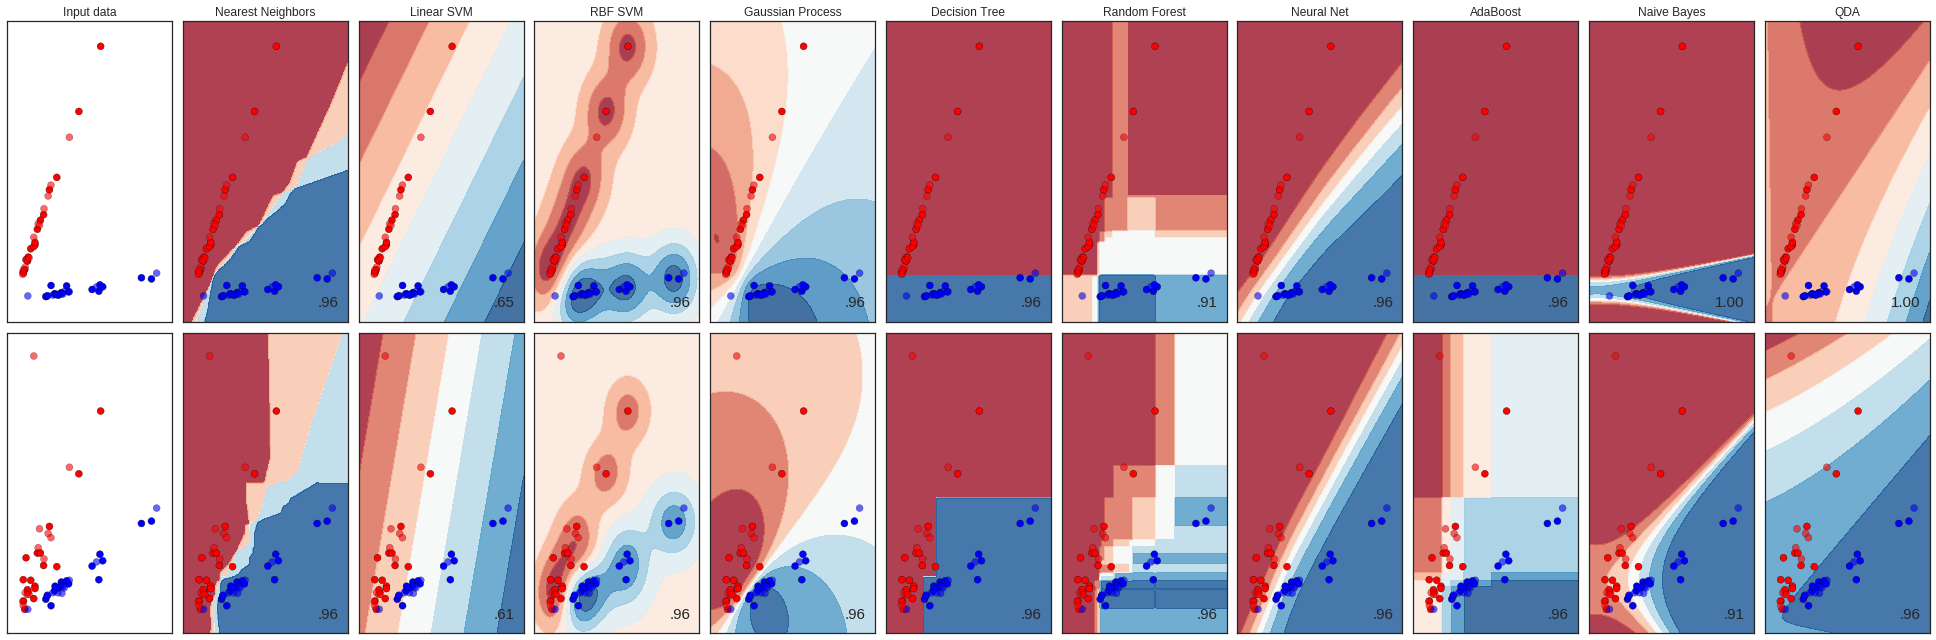

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# DATASETS
datasets = [(generate_Xy(Pm1A)), (generate_Xy(Pm10A))]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()


Nearest Neighbors: 0.983333 (0.050000)
Linear SVM: 0.983333 (0.050000)
RBF SVM: 0.050000 (0.150000)
Gaussian Process: 0.916667 (0.250000)
Decision Tree: 0.983333 (0.050000)
Random Forest: 0.933333 (0.110554)
Neural Net: 0.800000 (0.400000)
AdaBoost: 0.963333 (0.073711)
Naive Bayes: 1.000000 (0.000000)
QDA: 1.000000 (0.000000)


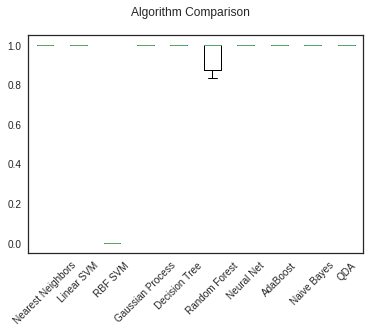

In [38]:
from sklearn import model_selection


X, y = generate_Xy(Pm1A)

# evaluate each model in turn
results = []
scoring = 'accuracy'
seed = 7
for name, clf in zip(names, classifiers):
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(clf, X, y.round(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()

## ML regression

In [51]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X, y)
reg.predict([[1785, 1469]])

array([-0.25681962])

In [70]:
c = []
xx, yy, ex, ey, nx, ny = [], [], [], [], [], []
for gen in NL:
    a = float(NL[gen][0])/NL[gen][1]
    b = reg.predict([NL[gen][::-1]])
    if gen in E_genes:
        ex.append(a)
        ey.append(b)
    elif gen in NE_genes:
        nx.append(a)
        ny.append(b)
    else:
        xx.append(a)
        yy.append(b)

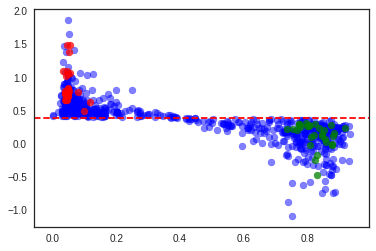

In [72]:
plt.scatter(xx, yy, c='blue' , alpha=0.5)
plt.scatter(ex, ey, c='red'  , alpha=0.75)
plt.scatter(nx, ny, c='green', alpha=0.75)
plt.axhline(y=0.38, c='red', linestyle='--')

In [ ]:
# QESSEN DAN
